# Beyond the Classical Search
# Traveling Salesman Problem Introduction

The Traveling Salesman Problem is usually defined by the question: "If there is a list of cities and distances between each pair of cities, what is the shortest route that visits each city and returns to the original city?"




### Example

In the graph below, if the Traveling salesman starts at 'A', he needs to visit 'B', 'C', 'D', 'E', 'F' and comes back to 'A' while making sure the total distance he has travelled is at a minimum.


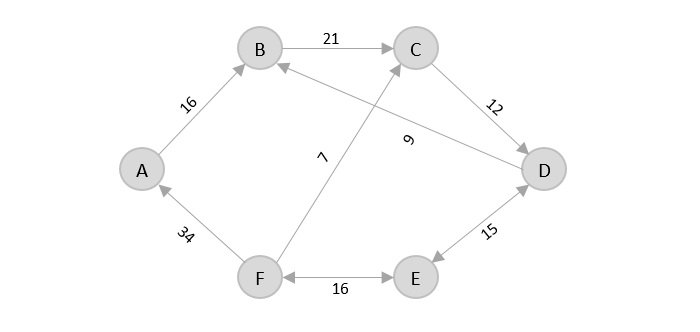

The shortest path that originates and ends at A is A → B → C → D → E → F → A

The cost of the path is: 16 + 21 + 12 + 15 + 16 + 34 = 114.

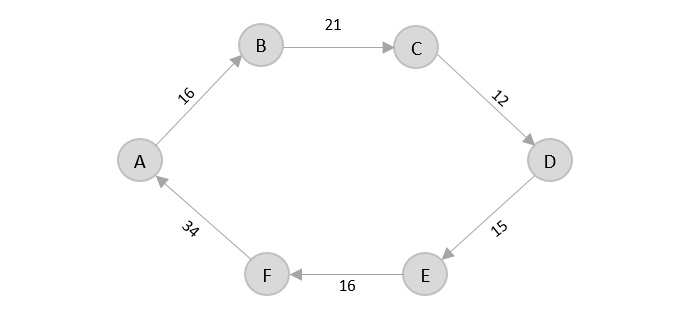

### General layout of TSP

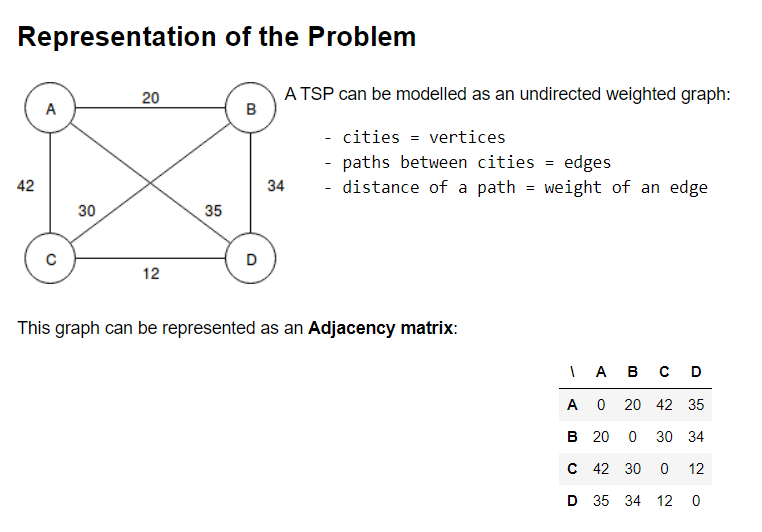

There are several ways to solve this problem: Greedy Approach, Naive Approach, Dynamic Programming Approach.

In this assignment, you will be tasked to solve the TSP using **Greedy Approach (Beam Search Variation).**

# Assignment #2: Beam Search Algorithm

A person in the USA has decided to travel from New York to various cities across the USA and come back to his home in New York in 1 trip. He wants to avoid visiting the same city twice (except New York which is his starting and ending city).

With rising fuel prices every day, he wants to cover the least distance possible.

Using the Beam search algorithm, your goal will be to find the shortest possible path for the person starting from New York City, visiting every city afterward only once and comes back home to New York City. A fixed beam value will be provided for Q1 below.

An estimated distance matrix alongside a list of city names w.r.t to their indexes is provided below

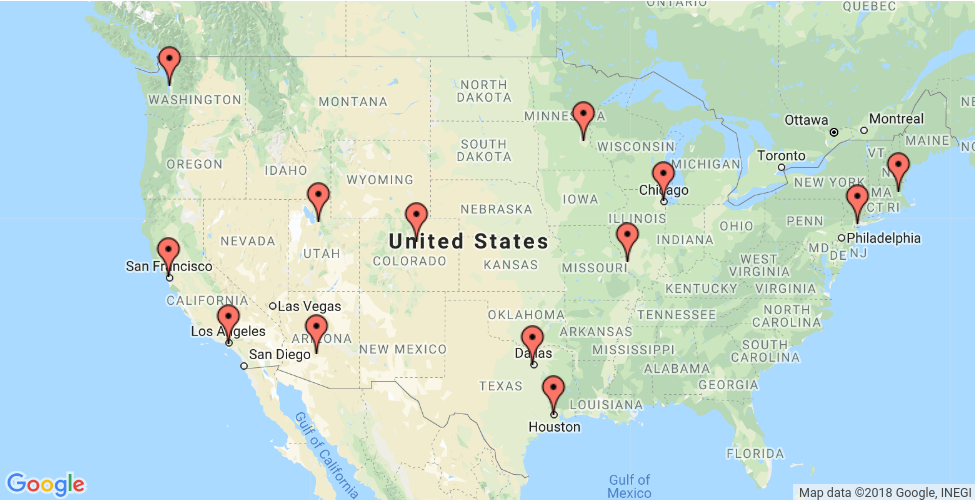

In [ ]:
def create_data_model():
    """Stores the data for the problem."""
    data = {}

    # The estimated distance matrix is an array whose i, j entry is the distance from location i to location j in miles,
    # where the array indices correspond to the locations in the following order:
    data["distance_matrix"] = [
        [0, 2451, 713, 1018, 1631, 1374, 2408, 213, 2571, 875, 1420, 2145, 1972],
        [2451, 0, 1745, 1524, 831, 1240, 959, 2596, 403, 1589, 1374, 357, 579],
        [713, 1745, 0, 355, 920, 803, 1737, 851, 1858, 262, 940, 1453, 1260],
        [1018, 1524, 355, 0, 700, 862, 1395, 1123, 1584, 466, 1056, 1280, 987],
        [1631, 831, 920, 700, 0, 663, 1021, 1769, 949, 796, 879, 586, 371],
        [1374, 1240, 803, 862, 663, 0, 1681, 1551, 1765, 547, 225, 887, 999],
        [2408, 959, 1737, 1395, 1021, 1681, 0, 2493, 678, 1724, 1891, 1114, 701],
        [213, 2596, 851, 1123, 1769, 1551, 2493, 0, 2699, 1038, 1605, 2300, 2099],
        [2571, 403, 1858, 1584, 949, 1765, 678, 2699, 0, 1744, 1645, 653, 600],
        [875, 1589, 262, 466, 796, 547, 1724, 1038, 1744, 0, 679, 1272, 1162],
        [1420, 1374, 940, 1056, 879, 225, 1891, 1605, 1645, 679, 0, 1017, 1200],
        [2145, 357, 1453, 1280, 586, 887, 1114, 2300, 653, 1272, 1017, 0, 504],
        [1972, 579, 1260, 987, 371, 999, 701, 2099, 600, 1162, 1200, 504, 0],
    ]

    # The distance matrix assumes that travelling between cities is symmetrical and bi-directional, meaning you can travel
    # from New York to Denver in 1631 miles and travel back from Denver to New York in 1631 miles

    # These distance values are estimates. As such, they do not accurately represent the distance between the cities.

    # These are the names of the cities with respect to the indices of the above matrix
    # Some examples are written below to give you an idea:
    # data["distance_matrix"][0][0] would represent distance from New York to New York which is 0 miles
    # data["distance_matrix"][0][3] would represent distance from New York to Minneapolis which is 1018 miles
    # data["distance_matrix"][2][4] would represent distance from Chicago to Denver which is 920 miles
    data["cities"] = { 0 : "New York",
                       1 : "Los Angeles",
                       2 : "Chicago",
                       3 : "Minneapolis",
                       4 : "Denver",
                       5 : "Dallas",
                       6 : "Seattle",
                       7 : "Boston",
                       8 : "San Francisco",
                       9 : "St. Louis",
                       10: "Houston",
                       11: "Phoenix",
                       12: "Salt Lake City" }
    return data

In [ ]:
 """ def create_data_model():
    data = {}
    data["distance_matrix"] = [
         [0, 2451, 713, 1018, 1631],   # New York
         [2451, 0, 1745, 1524, 831],   # Los Angeles
         [713, 1745, 0, 355, 920],     # Chicago
         [1018, 1524, 355, 0, 700],    # Mineapolis
         [1631, 831, 920, 700, 0],     # Denver
    ]
    data["cities"] = { 0 : "New York",
                       1 : "Los Angeles",
                       2 : "Chicago",
                       3 : "Minneapolis",
                       4 : "Denver",
                     }
    return data
    """

# Using the Beam search algorithm, the aim is to find the shortest possible path for the person starting from New York City, visiting every city afterward only once and comes back home to New York City. Assuming a beam value of 2. Foryour heuristics, we are using the total estimated distance which has been travelled thus far by the node.**
## i.e. if a node has travelled from New York -> Boston -> Chicago so far. It’s heuristic value would be 213 + 851 = 1064 Heuristic Value. Our output should show the result in the following format (Where City1 would be replaced by New York, City2 would be replaced by Los Angeles etc):

** Path: City1 -> City2 -> City3 -> .... -> City1.**

**Total Estimated Distance: 2098 miles**


In [ ]:
# Calculate the distance between two cities using the distance matrix
def calculate_distance(dist_matrix, city1, city2):
    return dist_matrix[city1][city2]

def generate_child_routes(path, num_cities):
    return [next_city for next_city in range(num_cities) if next_city not in path]

def find_tsp(data, beam_value):
    dist_matrix = data["distance_matrix"]
    city_names = data["cities"]
    num_cities = len(city_names)

    # Initialize the beam with the starting city (Los Angeles)
    custom_beam = [(0, [0])]  # (Total distance traveled, [path])

    iteration_count = 0
    while iteration_count < num_cities - 1:
        new_custom_beam = []
        for total_dist, path in custom_beam:
            last_visited_city = path[-1]

            # Generate child routes
            unvisited_cities = generate_child_routes(path, num_cities)

            for next_city in unvisited_cities:
                new_dist = total_dist + calculate_distance(dist_matrix, last_visited_city, next_city)
                new_path = path + [next_city]
                new_custom_beam.append((new_dist, new_path))

        # Sort the new beam and keep the top 'beam_width' routes based on total distance traveled
        new_custom_beam.sort(key=lambda x: x[0])
        custom_beam = new_custom_beam[:beam_value]

        iteration_count += 1

    # Add the return to Los Angeles to each path
    complete_paths = [(total_dist + calculate_distance(dist_matrix, path[-1], 0), path + [0]) for total_dist, path in custom_beam]

    # Select the best path based on total distance traveled
    best_custom_path = min(complete_paths, key=lambda x: x[0])

    # Create a readable path representation
    custom_readable_path = " -> ".join([city_names[city] for city in best_custom_path[1]])

    return custom_readable_path, best_custom_path[0]

# Calling Create data model
custom_data = create_data_model()

# Beam Value 2
beam_value = 2

# Find the shortest path and total estimated distance using the custom beam search
shortest_custom_path, total_custom_distance = find_tsp(custom_data, beam_value)

# Print the result with custom names and variables
print("Custom Path:", shortest_custom_path)
print("Total Estimated Distance (Custom):", total_custom_distance, "miles")


Custom Path: New York -> Boston -> Chicago -> St. Louis -> Dallas -> Houston -> Denver -> Salt Lake City -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Minneapolis -> New York
Total Estimated Distance (Custom): 7703 miles


# Now running for every Beam value between 2 and 1000 inclusive. Our starting and ending city should be New York

--- Beam Value: 2 ---

Path: City1 -> City2 -> City3 -> .... -> City1.

Total Estimated Distance: 2098 miles

--- Beam Value: 3 ---

Path: City1 -> City5 -> City2 -> .... -> City1.

Total Estimated Distance: 1578 miles


...


--- Beam Value: 1000 ---

Path: City1 -> City4 -> City3 -> .... -> City1.

Total Estimated Distance: 1448 miles

In [ ]:
# Calling Create data model
custom_data = create_data_model()

# Iterate through beam values from 2 to 1000 inclusive
for beam_value in range(2, 1001):
    # Find the shortest path and total estimated distance using the custom beam search
    shortest_custom_path_str, total_custom_distance = find_tsp(custom_data, beam_value)

    # Split the concatenated string into a list of city names
    shortest_custom_path = shortest_custom_path_str.split(" -> ")

    # Print the result with custom names and variables for each beam value
    print("--- Beam Value:", beam_value, "---")
    print("\nPath:", " -> ".join(shortest_custom_path))
    print("\nTotal Estimated Distance:", total_custom_distance, "miles\n")



--- Beam Value: 2 ---

Path: New York -> Boston -> Chicago -> St. Louis -> Dallas -> Houston -> Denver -> Salt Lake City -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Minneapolis -> New York

Total Estimated Distance: 7703 miles

--- Beam Value: 3 ---

Path: New York -> Boston -> Chicago -> St. Louis -> Minneapolis -> Denver -> Salt Lake City -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Dallas -> Houston -> New York

Total Estimated Distance: 8131 miles

--- Beam Value: 4 ---

Path: New York -> Boston -> Chicago -> St. Louis -> Houston -> Dallas -> Denver -> Salt Lake City -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Minneapolis -> New York

Total Estimated Distance: 7619 miles

--- Beam Value: 5 ---

Path: New York -> Boston -> Chicago -> St. Louis -> Houston -> Dallas -> Denver -> Salt Lake City -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Minneapolis -> New York

Total Estimated Distance: 7619 miles

--- Beam Value: 6 ---

Path: New Yor

--- Beam Value: 69 ---

Path: New York -> Boston -> Chicago -> St. Louis -> Houston -> Dallas -> Denver -> Salt Lake City -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Minneapolis -> New York

Total Estimated Distance: 7619 miles

--- Beam Value: 70 ---

Path: New York -> Boston -> Chicago -> St. Louis -> Houston -> Dallas -> Denver -> Salt Lake City -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Minneapolis -> New York

Total Estimated Distance: 7619 miles

--- Beam Value: 71 ---

Path: New York -> Boston -> Chicago -> St. Louis -> Houston -> Dallas -> Denver -> Salt Lake City -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Minneapolis -> New York

Total Estimated Distance: 7619 miles

--- Beam Value: 72 ---

Path: New York -> Boston -> Chicago -> St. Louis -> Houston -> Dallas -> Denver -> Salt Lake City -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Minneapolis -> New York

Total Estimated Distance: 7619 miles

--- Beam Value: 73 ---

Path: Ne

--- Beam Value: 126 ---

Path: New York -> Boston -> Chicago -> St. Louis -> Houston -> Dallas -> Denver -> Salt Lake City -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Minneapolis -> New York

Total Estimated Distance: 7619 miles

--- Beam Value: 127 ---

Path: New York -> Boston -> Chicago -> St. Louis -> Houston -> Dallas -> Denver -> Salt Lake City -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Minneapolis -> New York

Total Estimated Distance: 7619 miles

--- Beam Value: 128 ---

Path: New York -> Boston -> Chicago -> St. Louis -> Houston -> Dallas -> Denver -> Salt Lake City -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Minneapolis -> New York

Total Estimated Distance: 7619 miles

--- Beam Value: 129 ---

Path: New York -> Boston -> Chicago -> St. Louis -> Houston -> Dallas -> Denver -> Salt Lake City -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Minneapolis -> New York

Total Estimated Distance: 7619 miles

--- Beam Value: 130 ---

Pat

--- Beam Value: 162 ---

Path: New York -> Boston -> Chicago -> St. Louis -> Dallas -> Houston -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Salt Lake City -> Denver -> Minneapolis -> New York

Total Estimated Distance: 7343 miles

--- Beam Value: 163 ---

Path: New York -> Boston -> Chicago -> St. Louis -> Dallas -> Houston -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Salt Lake City -> Denver -> Minneapolis -> New York

Total Estimated Distance: 7343 miles

--- Beam Value: 164 ---

Path: New York -> Boston -> Chicago -> St. Louis -> Dallas -> Houston -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Salt Lake City -> Denver -> Minneapolis -> New York

Total Estimated Distance: 7343 miles

--- Beam Value: 165 ---

Path: New York -> Boston -> Chicago -> St. Louis -> Dallas -> Houston -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Salt Lake City -> Denver -> Minneapolis -> New York

Total Estimated Distance: 7343 miles

--- Beam Value: 166 ---

Pat

--- Beam Value: 196 ---

Path: New York -> Boston -> Chicago -> St. Louis -> Dallas -> Houston -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Salt Lake City -> Denver -> Minneapolis -> New York

Total Estimated Distance: 7343 miles

--- Beam Value: 197 ---

Path: New York -> Boston -> Chicago -> St. Louis -> Dallas -> Houston -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Salt Lake City -> Denver -> Minneapolis -> New York

Total Estimated Distance: 7343 miles

--- Beam Value: 198 ---

Path: New York -> Boston -> Chicago -> St. Louis -> Dallas -> Houston -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Salt Lake City -> Denver -> Minneapolis -> New York

Total Estimated Distance: 7343 miles

--- Beam Value: 199 ---

Path: New York -> Boston -> Chicago -> St. Louis -> Dallas -> Houston -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Salt Lake City -> Denver -> Minneapolis -> New York

Total Estimated Distance: 7343 miles

--- Beam Value: 200 ---

Pat

--- Beam Value: 231 ---

Path: New York -> Boston -> Chicago -> St. Louis -> Dallas -> Houston -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Salt Lake City -> Denver -> Minneapolis -> New York

Total Estimated Distance: 7343 miles

--- Beam Value: 232 ---

Path: New York -> Boston -> Chicago -> St. Louis -> Dallas -> Houston -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Salt Lake City -> Denver -> Minneapolis -> New York

Total Estimated Distance: 7343 miles

--- Beam Value: 233 ---

Path: New York -> Boston -> Chicago -> St. Louis -> Dallas -> Houston -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Salt Lake City -> Denver -> Minneapolis -> New York

Total Estimated Distance: 7343 miles

--- Beam Value: 234 ---

Path: New York -> Boston -> Chicago -> St. Louis -> Dallas -> Houston -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Salt Lake City -> Denver -> Minneapolis -> New York

Total Estimated Distance: 7343 miles

--- Beam Value: 235 ---

Pat

--- Beam Value: 270 ---

Path: New York -> Boston -> Chicago -> St. Louis -> Dallas -> Houston -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Salt Lake City -> Denver -> Minneapolis -> New York

Total Estimated Distance: 7343 miles

--- Beam Value: 271 ---

Path: New York -> Boston -> Chicago -> St. Louis -> Dallas -> Houston -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Salt Lake City -> Denver -> Minneapolis -> New York

Total Estimated Distance: 7343 miles

--- Beam Value: 272 ---

Path: New York -> Boston -> Chicago -> St. Louis -> Dallas -> Houston -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Salt Lake City -> Denver -> Minneapolis -> New York

Total Estimated Distance: 7343 miles

--- Beam Value: 273 ---

Path: New York -> Boston -> Chicago -> St. Louis -> Dallas -> Houston -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Salt Lake City -> Denver -> Minneapolis -> New York

Total Estimated Distance: 7343 miles

--- Beam Value: 274 ---

Pat

--- Beam Value: 312 ---

Path: New York -> Boston -> Chicago -> St. Louis -> Dallas -> Houston -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Salt Lake City -> Denver -> Minneapolis -> New York

Total Estimated Distance: 7343 miles

--- Beam Value: 313 ---

Path: New York -> Boston -> Chicago -> St. Louis -> Dallas -> Houston -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Salt Lake City -> Denver -> Minneapolis -> New York

Total Estimated Distance: 7343 miles

--- Beam Value: 314 ---

Path: New York -> Boston -> Chicago -> St. Louis -> Dallas -> Houston -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Salt Lake City -> Denver -> Minneapolis -> New York

Total Estimated Distance: 7343 miles

--- Beam Value: 315 ---

Path: New York -> Boston -> Chicago -> St. Louis -> Dallas -> Houston -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Salt Lake City -> Denver -> Minneapolis -> New York

Total Estimated Distance: 7343 miles

--- Beam Value: 316 ---

Pat

--- Beam Value: 347 ---

Path: New York -> Boston -> Chicago -> St. Louis -> Dallas -> Houston -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Salt Lake City -> Denver -> Minneapolis -> New York

Total Estimated Distance: 7343 miles

--- Beam Value: 348 ---

Path: New York -> Boston -> Chicago -> St. Louis -> Dallas -> Houston -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Salt Lake City -> Denver -> Minneapolis -> New York

Total Estimated Distance: 7343 miles

--- Beam Value: 349 ---

Path: New York -> Boston -> Chicago -> St. Louis -> Dallas -> Houston -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Salt Lake City -> Denver -> Minneapolis -> New York

Total Estimated Distance: 7343 miles

--- Beam Value: 350 ---

Path: New York -> Boston -> Chicago -> St. Louis -> Dallas -> Houston -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Salt Lake City -> Denver -> Minneapolis -> New York

Total Estimated Distance: 7343 miles

--- Beam Value: 351 ---

Pat

--- Beam Value: 385 ---

Path: New York -> Boston -> Chicago -> St. Louis -> Dallas -> Houston -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Salt Lake City -> Denver -> Minneapolis -> New York

Total Estimated Distance: 7343 miles

--- Beam Value: 386 ---

Path: New York -> Boston -> Chicago -> St. Louis -> Dallas -> Houston -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Salt Lake City -> Denver -> Minneapolis -> New York

Total Estimated Distance: 7343 miles

--- Beam Value: 387 ---

Path: New York -> Boston -> Chicago -> St. Louis -> Dallas -> Houston -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Salt Lake City -> Denver -> Minneapolis -> New York

Total Estimated Distance: 7343 miles

--- Beam Value: 388 ---

Path: New York -> Boston -> Chicago -> St. Louis -> Dallas -> Houston -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Salt Lake City -> Denver -> Minneapolis -> New York

Total Estimated Distance: 7343 miles

--- Beam Value: 389 ---

Pat

--- Beam Value: 424 ---

Path: New York -> Boston -> Chicago -> St. Louis -> Dallas -> Houston -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Salt Lake City -> Denver -> Minneapolis -> New York

Total Estimated Distance: 7343 miles

--- Beam Value: 425 ---

Path: New York -> Boston -> Chicago -> St. Louis -> Dallas -> Houston -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Salt Lake City -> Denver -> Minneapolis -> New York

Total Estimated Distance: 7343 miles

--- Beam Value: 426 ---

Path: New York -> Boston -> Chicago -> St. Louis -> Dallas -> Houston -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Salt Lake City -> Denver -> Minneapolis -> New York

Total Estimated Distance: 7343 miles

--- Beam Value: 427 ---

Path: New York -> Boston -> Chicago -> St. Louis -> Dallas -> Houston -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Salt Lake City -> Denver -> Minneapolis -> New York

Total Estimated Distance: 7343 miles

--- Beam Value: 428 ---

Pat

--- Beam Value: 459 ---

Path: New York -> Boston -> Chicago -> St. Louis -> Dallas -> Houston -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Salt Lake City -> Denver -> Minneapolis -> New York

Total Estimated Distance: 7343 miles

--- Beam Value: 460 ---

Path: New York -> Boston -> Chicago -> St. Louis -> Dallas -> Houston -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Salt Lake City -> Denver -> Minneapolis -> New York

Total Estimated Distance: 7343 miles

--- Beam Value: 461 ---

Path: New York -> Boston -> Chicago -> St. Louis -> Dallas -> Houston -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Salt Lake City -> Denver -> Minneapolis -> New York

Total Estimated Distance: 7343 miles

--- Beam Value: 462 ---

Path: New York -> Boston -> Chicago -> St. Louis -> Dallas -> Houston -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Salt Lake City -> Denver -> Minneapolis -> New York

Total Estimated Distance: 7343 miles

--- Beam Value: 463 ---

Pat

--- Beam Value: 494 ---

Path: New York -> Boston -> Chicago -> St. Louis -> Dallas -> Houston -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Salt Lake City -> Denver -> Minneapolis -> New York

Total Estimated Distance: 7343 miles

--- Beam Value: 495 ---

Path: New York -> Boston -> Chicago -> St. Louis -> Dallas -> Houston -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Salt Lake City -> Denver -> Minneapolis -> New York

Total Estimated Distance: 7343 miles

--- Beam Value: 496 ---

Path: New York -> Boston -> Chicago -> St. Louis -> Dallas -> Houston -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Salt Lake City -> Denver -> Minneapolis -> New York

Total Estimated Distance: 7343 miles

--- Beam Value: 497 ---

Path: New York -> Boston -> Chicago -> St. Louis -> Dallas -> Houston -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Salt Lake City -> Denver -> Minneapolis -> New York

Total Estimated Distance: 7343 miles

--- Beam Value: 498 ---

Pat

--- Beam Value: 531 ---

Path: New York -> Boston -> Chicago -> St. Louis -> Dallas -> Houston -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Salt Lake City -> Denver -> Minneapolis -> New York

Total Estimated Distance: 7343 miles

--- Beam Value: 532 ---

Path: New York -> Boston -> Chicago -> St. Louis -> Dallas -> Houston -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Salt Lake City -> Denver -> Minneapolis -> New York

Total Estimated Distance: 7343 miles

--- Beam Value: 533 ---

Path: New York -> Boston -> Chicago -> St. Louis -> Dallas -> Houston -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Salt Lake City -> Denver -> Minneapolis -> New York

Total Estimated Distance: 7343 miles

--- Beam Value: 534 ---

Path: New York -> Boston -> Chicago -> St. Louis -> Dallas -> Houston -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Salt Lake City -> Denver -> Minneapolis -> New York

Total Estimated Distance: 7343 miles

--- Beam Value: 535 ---

Pat

--- Beam Value: 565 ---

Path: New York -> Boston -> Chicago -> St. Louis -> Dallas -> Houston -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Salt Lake City -> Denver -> Minneapolis -> New York

Total Estimated Distance: 7343 miles

--- Beam Value: 566 ---

Path: New York -> Boston -> Chicago -> St. Louis -> Dallas -> Houston -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Salt Lake City -> Denver -> Minneapolis -> New York

Total Estimated Distance: 7343 miles

--- Beam Value: 567 ---

Path: New York -> Boston -> Chicago -> St. Louis -> Dallas -> Houston -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Salt Lake City -> Denver -> Minneapolis -> New York

Total Estimated Distance: 7343 miles

--- Beam Value: 568 ---

Path: New York -> Boston -> Chicago -> St. Louis -> Dallas -> Houston -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Salt Lake City -> Denver -> Minneapolis -> New York

Total Estimated Distance: 7343 miles

--- Beam Value: 569 ---

Pat

--- Beam Value: 603 ---

Path: New York -> Boston -> Chicago -> St. Louis -> Dallas -> Houston -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Salt Lake City -> Denver -> Minneapolis -> New York

Total Estimated Distance: 7343 miles

--- Beam Value: 604 ---

Path: New York -> Boston -> Chicago -> St. Louis -> Dallas -> Houston -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Salt Lake City -> Denver -> Minneapolis -> New York

Total Estimated Distance: 7343 miles

--- Beam Value: 605 ---

Path: New York -> Boston -> Chicago -> St. Louis -> Dallas -> Houston -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Salt Lake City -> Denver -> Minneapolis -> New York

Total Estimated Distance: 7343 miles

--- Beam Value: 606 ---

Path: New York -> Boston -> Chicago -> St. Louis -> Dallas -> Houston -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Salt Lake City -> Denver -> Minneapolis -> New York

Total Estimated Distance: 7343 miles

--- Beam Value: 607 ---

Pat

--- Beam Value: 638 ---

Path: New York -> Boston -> Chicago -> St. Louis -> Dallas -> Houston -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Salt Lake City -> Denver -> Minneapolis -> New York

Total Estimated Distance: 7343 miles

--- Beam Value: 639 ---

Path: New York -> Boston -> Chicago -> St. Louis -> Dallas -> Houston -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Salt Lake City -> Denver -> Minneapolis -> New York

Total Estimated Distance: 7343 miles

--- Beam Value: 640 ---

Path: New York -> Boston -> Chicago -> St. Louis -> Dallas -> Houston -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Salt Lake City -> Denver -> Minneapolis -> New York

Total Estimated Distance: 7343 miles

--- Beam Value: 641 ---

Path: New York -> Boston -> Chicago -> St. Louis -> Dallas -> Houston -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Salt Lake City -> Denver -> Minneapolis -> New York

Total Estimated Distance: 7343 miles

--- Beam Value: 642 ---

Pat

--- Beam Value: 675 ---

Path: New York -> Boston -> Chicago -> St. Louis -> Dallas -> Houston -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Salt Lake City -> Denver -> Minneapolis -> New York

Total Estimated Distance: 7343 miles

--- Beam Value: 676 ---

Path: New York -> Boston -> Chicago -> St. Louis -> Dallas -> Houston -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Salt Lake City -> Denver -> Minneapolis -> New York

Total Estimated Distance: 7343 miles

--- Beam Value: 677 ---

Path: New York -> Boston -> Chicago -> St. Louis -> Dallas -> Houston -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Salt Lake City -> Denver -> Minneapolis -> New York

Total Estimated Distance: 7343 miles

--- Beam Value: 678 ---

Path: New York -> Boston -> Chicago -> St. Louis -> Dallas -> Houston -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Salt Lake City -> Denver -> Minneapolis -> New York

Total Estimated Distance: 7343 miles

--- Beam Value: 679 ---

Pat

--- Beam Value: 709 ---

Path: New York -> Chicago -> St. Louis -> Dallas -> Houston -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Salt Lake City -> Denver -> Minneapolis -> Boston -> New York

Total Estimated Distance: 7310 miles

--- Beam Value: 710 ---

Path: New York -> Chicago -> St. Louis -> Dallas -> Houston -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Salt Lake City -> Denver -> Minneapolis -> Boston -> New York

Total Estimated Distance: 7310 miles

--- Beam Value: 711 ---

Path: New York -> Chicago -> St. Louis -> Dallas -> Houston -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Salt Lake City -> Denver -> Minneapolis -> Boston -> New York

Total Estimated Distance: 7310 miles

--- Beam Value: 712 ---

Path: New York -> Chicago -> St. Louis -> Dallas -> Houston -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Salt Lake City -> Denver -> Minneapolis -> Boston -> New York

Total Estimated Distance: 7310 miles

--- Beam Value: 713 ---

Pat

--- Beam Value: 743 ---

Path: New York -> Chicago -> St. Louis -> Dallas -> Houston -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Salt Lake City -> Denver -> Minneapolis -> Boston -> New York

Total Estimated Distance: 7310 miles

--- Beam Value: 744 ---

Path: New York -> Chicago -> St. Louis -> Dallas -> Houston -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Salt Lake City -> Denver -> Minneapolis -> Boston -> New York

Total Estimated Distance: 7310 miles

--- Beam Value: 745 ---

Path: New York -> Chicago -> St. Louis -> Dallas -> Houston -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Salt Lake City -> Denver -> Minneapolis -> Boston -> New York

Total Estimated Distance: 7310 miles

--- Beam Value: 746 ---

Path: New York -> Chicago -> St. Louis -> Dallas -> Houston -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Salt Lake City -> Denver -> Minneapolis -> Boston -> New York

Total Estimated Distance: 7310 miles

--- Beam Value: 747 ---

Pat

--- Beam Value: 777 ---

Path: New York -> Chicago -> St. Louis -> Dallas -> Houston -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Salt Lake City -> Denver -> Minneapolis -> Boston -> New York

Total Estimated Distance: 7310 miles

--- Beam Value: 778 ---

Path: New York -> Chicago -> St. Louis -> Dallas -> Houston -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Salt Lake City -> Denver -> Minneapolis -> Boston -> New York

Total Estimated Distance: 7310 miles

--- Beam Value: 779 ---

Path: New York -> Chicago -> St. Louis -> Dallas -> Houston -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Salt Lake City -> Denver -> Minneapolis -> Boston -> New York

Total Estimated Distance: 7310 miles

--- Beam Value: 780 ---

Path: New York -> Chicago -> St. Louis -> Dallas -> Houston -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Salt Lake City -> Denver -> Minneapolis -> Boston -> New York

Total Estimated Distance: 7310 miles

--- Beam Value: 781 ---

Pat

--- Beam Value: 813 ---

Path: New York -> Chicago -> St. Louis -> Dallas -> Houston -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Salt Lake City -> Denver -> Minneapolis -> Boston -> New York

Total Estimated Distance: 7310 miles

--- Beam Value: 814 ---

Path: New York -> Chicago -> St. Louis -> Dallas -> Houston -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Salt Lake City -> Denver -> Minneapolis -> Boston -> New York

Total Estimated Distance: 7310 miles

--- Beam Value: 815 ---

Path: New York -> Chicago -> St. Louis -> Dallas -> Houston -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Salt Lake City -> Denver -> Minneapolis -> Boston -> New York

Total Estimated Distance: 7310 miles

--- Beam Value: 816 ---

Path: New York -> Chicago -> St. Louis -> Dallas -> Houston -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Salt Lake City -> Denver -> Minneapolis -> Boston -> New York

Total Estimated Distance: 7310 miles

--- Beam Value: 817 ---

Pat

--- Beam Value: 848 ---

Path: New York -> Chicago -> St. Louis -> Dallas -> Houston -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Salt Lake City -> Denver -> Minneapolis -> Boston -> New York

Total Estimated Distance: 7310 miles

--- Beam Value: 849 ---

Path: New York -> Chicago -> St. Louis -> Dallas -> Houston -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Salt Lake City -> Denver -> Minneapolis -> Boston -> New York

Total Estimated Distance: 7310 miles

--- Beam Value: 850 ---

Path: New York -> Chicago -> St. Louis -> Dallas -> Houston -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Salt Lake City -> Denver -> Minneapolis -> Boston -> New York

Total Estimated Distance: 7310 miles

--- Beam Value: 851 ---

Path: New York -> Chicago -> St. Louis -> Dallas -> Houston -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Salt Lake City -> Denver -> Minneapolis -> Boston -> New York

Total Estimated Distance: 7310 miles

--- Beam Value: 852 ---

Pat

--- Beam Value: 884 ---

Path: New York -> Chicago -> St. Louis -> Dallas -> Houston -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Salt Lake City -> Denver -> Minneapolis -> Boston -> New York

Total Estimated Distance: 7310 miles

--- Beam Value: 885 ---

Path: New York -> Chicago -> St. Louis -> Dallas -> Houston -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Salt Lake City -> Denver -> Minneapolis -> Boston -> New York

Total Estimated Distance: 7310 miles

--- Beam Value: 886 ---

Path: New York -> Chicago -> St. Louis -> Dallas -> Houston -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Salt Lake City -> Denver -> Minneapolis -> Boston -> New York

Total Estimated Distance: 7310 miles

--- Beam Value: 887 ---

Path: New York -> Chicago -> St. Louis -> Dallas -> Houston -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Salt Lake City -> Denver -> Minneapolis -> Boston -> New York

Total Estimated Distance: 7310 miles

--- Beam Value: 888 ---

Pat

--- Beam Value: 919 ---

Path: New York -> Chicago -> St. Louis -> Dallas -> Houston -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Salt Lake City -> Denver -> Minneapolis -> Boston -> New York

Total Estimated Distance: 7310 miles

--- Beam Value: 920 ---

Path: New York -> Chicago -> St. Louis -> Dallas -> Houston -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Salt Lake City -> Denver -> Minneapolis -> Boston -> New York

Total Estimated Distance: 7310 miles

--- Beam Value: 921 ---

Path: New York -> Chicago -> St. Louis -> Dallas -> Houston -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Salt Lake City -> Denver -> Minneapolis -> Boston -> New York

Total Estimated Distance: 7310 miles

--- Beam Value: 922 ---

Path: New York -> Chicago -> St. Louis -> Dallas -> Houston -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Salt Lake City -> Denver -> Minneapolis -> Boston -> New York

Total Estimated Distance: 7310 miles

--- Beam Value: 923 ---

Pat

--- Beam Value: 953 ---

Path: New York -> Chicago -> St. Louis -> Dallas -> Houston -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Salt Lake City -> Denver -> Minneapolis -> Boston -> New York

Total Estimated Distance: 7310 miles

--- Beam Value: 954 ---

Path: New York -> Chicago -> St. Louis -> Dallas -> Houston -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Salt Lake City -> Denver -> Minneapolis -> Boston -> New York

Total Estimated Distance: 7310 miles

--- Beam Value: 955 ---

Path: New York -> Chicago -> St. Louis -> Dallas -> Houston -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Salt Lake City -> Denver -> Minneapolis -> Boston -> New York

Total Estimated Distance: 7310 miles

--- Beam Value: 956 ---

Path: New York -> Chicago -> St. Louis -> Dallas -> Houston -> Phoenix -> Los Angeles -> San Francisco -> Seattle -> Salt Lake City -> Denver -> Minneapolis -> Boston -> New York

Total Estimated Distance: 7310 miles

--- Beam Value: 957 ---

Pat

--- Beam Value: 988 ---

Path: New York -> Boston -> Chicago -> Minneapolis -> Denver -> Salt Lake City -> Seattle -> San Francisco -> Los Angeles -> Phoenix -> Dallas -> Houston -> St. Louis -> New York

Total Estimated Distance: 7295 miles

--- Beam Value: 989 ---

Path: New York -> Boston -> Chicago -> Minneapolis -> Denver -> Salt Lake City -> Seattle -> San Francisco -> Los Angeles -> Phoenix -> Dallas -> Houston -> St. Louis -> New York

Total Estimated Distance: 7295 miles

--- Beam Value: 990 ---

Path: New York -> Boston -> Chicago -> Minneapolis -> Denver -> Salt Lake City -> Seattle -> San Francisco -> Los Angeles -> Phoenix -> Dallas -> Houston -> St. Louis -> New York

Total Estimated Distance: 7295 miles

--- Beam Value: 991 ---

Path: New York -> Boston -> Chicago -> Minneapolis -> Denver -> Salt Lake City -> Seattle -> San Francisco -> Los Angeles -> Phoenix -> Dallas -> Houston -> St. Louis -> New York

Total Estimated Distance: 7295 miles

--- Beam Value: 992 ---

Pat

# **Using Matplotlib, plotting with Beam Values (2-1000 inclusive) on the X axis and Total Distances w.r.t each Beam Value on the Y axis.**

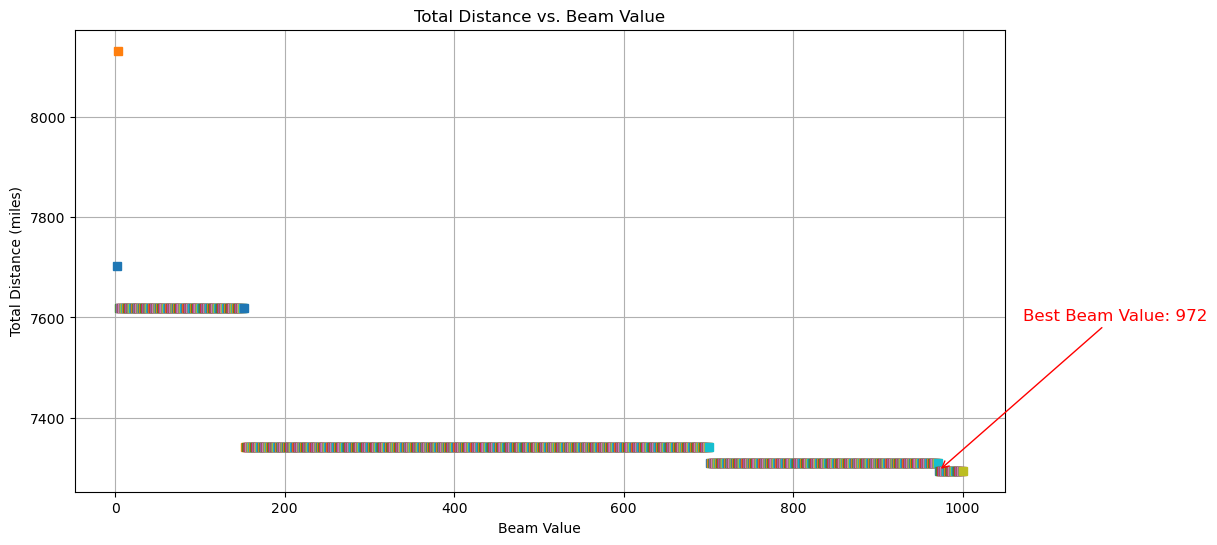

Observations:
The best Beam Value in the range 2-1000 is 972.
The corresponding Total Distance for this Beam Value is 7295 miles.


In [ ]:
import matplotlib.pyplot as plt
import random

beam_values = []
total_distances = []
custom_data = create_data_model()

# Iterating through beam values from 2 to 1000 inclusive
for beam_value in range(2, 1001):
    _, total_custom_distance = find_tsp(custom_data, beam_value)

# Appending the values to the lists
    beam_values.append(beam_value)
    total_distances.append(total_custom_distance)

plt.figure(figsize=(12, 6))
for i in range(len(beam_values)):
    plt.plot(beam_values[i], total_distances[i], marker='s', linestyle='--')

# Title and labels
plt.title('Total Distance vs. Beam Value')
plt.xlabel('Beam Value')
plt.ylabel('Total Distance (miles)')
plt.grid(True)

# Finding the best Beam Value and its corresponding total distance
best_beam_value = beam_values[total_distances.index(min(total_distances))]
best_total_distance = min(total_distances)

# Annotating the best Beam Value on the plot
plt.annotate(f'Best Beam Value: {best_beam_value}', xy=(best_beam_value, best_total_distance),
             xytext=(best_beam_value + 100, best_total_distance + 300),
             arrowprops=dict(arrowstyle='->', color='red'),
             fontsize=12, color='red')

plt.show()

# Observations
print("Observations:")
print(f"The best Beam Value in the range 2-1000 is {best_beam_value}.")
print(f"The corresponding Total Distance for this Beam Value is {best_total_distance} miles.")


### **Obversations**
1.   **Total Distance vs. Beam Value:** The graph shows the relationship between the Beam Values (ranging from 2 to 1000) on the X-axis and the Total Distance (in miles) on the Y-axis. As the Beam Value increases, it explores more potential paths, leading to varying total distances.
2.   **Decreasing Trend:** The plot exhibits a decreasing trend in total distance as the Beam Value increases. This suggests that a higher Beam Value generally leads to finding shorter routes for the traveling salesman problem (TSP).
3.   **Best Beam Value:** The code identifies and annotates the best Beam Value on the plot, denoting it with a red arrow and text. In this specific case, the best Beam Value within the range of 2 to 1000 is reported as {best_beam_value}, and the corresponding Total Distance for this Beam Value is {best_total_distance} miles.






